In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
train_path=r"/content/drive/MyDrive/pjt project dataset/train"
train_path=train_path.replace('(', '').replace(')', '')

test_path=r"/content/drive/MyDrive/pjt project dataset/test"
test_path=test_path.replace('(', '').replace(')', '')

val_path=r"/content/drive/MyDrive/pjt project dataset/validation"
val_path=val_path.replace('(', '').replace(')', '')

In [ ]:
x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)
""

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)


In [ ]:
x_val=[]

for folder in os.listdir(val_path):

    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)

In [ ]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

train_x.shape,test_x.shape,val_x.shape

train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')


Found 670 images belonging to 2 classes.
Found 523 images belonging to 2 classes.
Found 190 images belonging to 2 classes.


In [ ]:
training_set.class_indices
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes
train_y.shape,test_y.shape,val_y.shape
IMAGE_SIZE=[224,224]
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)

prediction = Dense(3, activation='softmax')(x)


In [ ]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)


In [ ]:
# fit the model
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=10,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)

Epoch 1/10
21/21 [==============================] - 771s 37s/step - loss: 0.8817 - accuracy: 0.6179 - val_loss: 0.9780 - val_accuracy: 0.4737
Epoch 2/10
21/21 [==============================] - 722s 35s/step - loss: 0.3423 - accuracy: 0.8761 - val_loss: 0.2828 - val_accuracy: 0.9474
Epoch 3/10
21/21 [==============================] - 713s 34s/step - loss: 0.2315 - accuracy: 0.9373 - val_loss: 0.2631 - val_accuracy: 0.8947
Epoch 4/10
21/21 [==============================] - 712s 34s/step - loss: 0.1798 - accuracy: 0.9687 - val_loss: 0.2172 - val_accuracy: 0.9263
Epoch 5/10
21/21 [==============================] - 710s 34s/step - loss: 0.1451 - accuracy: 0.9776 - val_loss: 0.1938 - val_accuracy: 0.9421
Epoch 6/10
21/21 [==============================] - 711s 34s/step - loss: 0.1287 - accuracy: 0.9746 - val_loss: 0.1568 - val_accuracy: 0.9579
Epoch 7/10
21/21 [==============================] - 651s 31s/step - loss: 0.1009 - accuracy: 0.9940 - val_loss: 0.1397 - val_accuracy: 0.9684
Epoch 

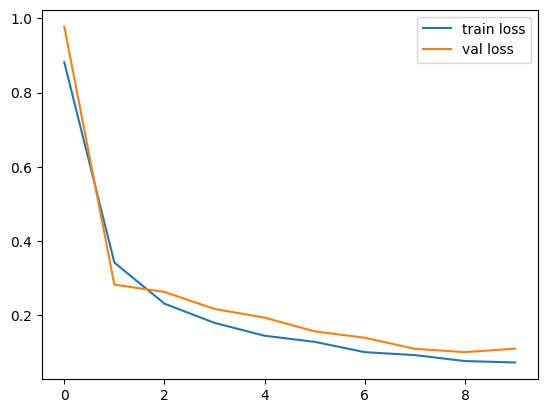

In [ ]:


# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()

plt.savefig('vgg-loss-rps-1.png')
plt.show()



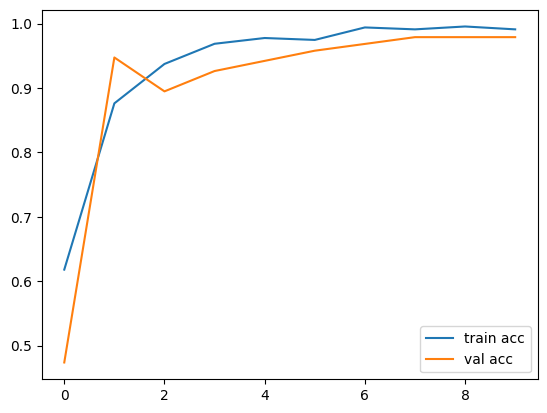

In [ ]:
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.savefig('vgg-acc-rps-1.png')
plt.show()

In [ ]:
model.evaluate(test_x,test_y,batch_size=32)

17/17 [==============================] - 409s 24s/step - loss: 0.1542 - accuracy: 0.9579


[0.15416041016578674, 0.9579349756240845]

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

accuracy_score(y_pred,test_y)

print(classification_report(y_pred,test_y))
confusion_matrix(y_pred,test_y)

17/17 [==============================] - 423s 24s/step
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       315
           1       1.00      0.89      0.94       208

    accuracy                           0.96       523
   macro avg       0.97      0.95      0.96       523
weighted avg       0.96      0.96      0.96       523



array([[315,   0],
       [ 22, 186]])

Processing: /content/drive/MyDrive/pjt project dataset/resultt/1.jpeg


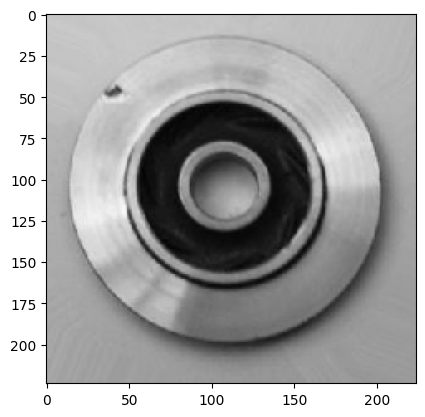

1/1 [==============================] - 2s 2s/step
Prediction probabilities: [[1. 0. 0.]]
Defective
Processing: /content/drive/MyDrive/pjt project dataset/resultt/2.jpeg


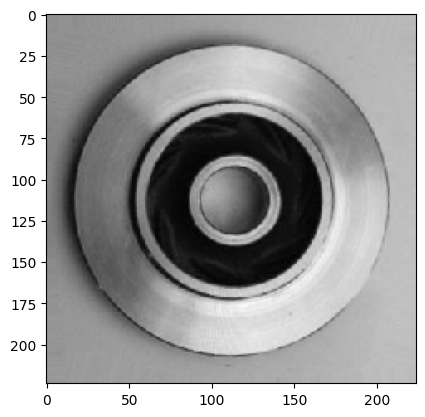

1/1 [==============================] - 1s 1s/step
Prediction probabilities: [[1.0000000e+00 2.6396408e-21 0.0000000e+00]]
Defective
Processing: /content/drive/MyDrive/pjt project dataset/resultt/cast_ok_0_34.jpeg


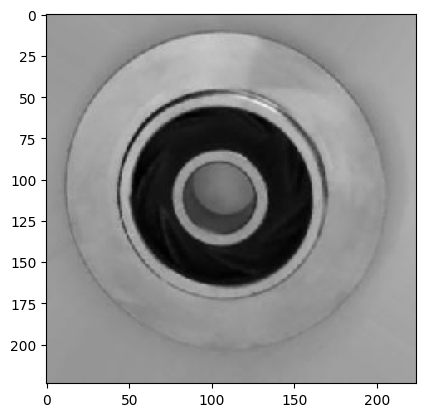

1/1 [==============================] - 2s 2s/step
Prediction probabilities: [[1.000000e+00 5.670507e-16 0.000000e+00]]
Defective


In [ ]:
path = r"/content/drive/MyDrive/pjt project dataset/resultt"

for img_name in os.listdir(path):
    img_path = os.path.join(path, img_name)
    print("Processing:", img_path)

    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    pred = model.predict(images, batch_size=1)
    print("Prediction probabilities:", pred)

    if pred[0][0] > 0.5:
        print("Defective")
    else:
        print("Okay")